# Assignment 06

In [1]:
# import the data
# sep x,y
# find out the coef , intercept
# y = m1*x1 + m2*x2 + m3*x3 + c

#KNN Regressor


# calculate r2_score
#compared

In [2]:
import pandas as pd
import numpy as np

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Encoding 

In [5]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 


for col in df.columns:
    if df[col].dtype == np.number:
        continue
    else:
        df[col] = LabelEncoder().fit_transform(df[col])


In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,1,0,27.900,0,1,3,16884.92400
1,0,1,33.770,1,0,2,1725.55230
2,10,1,33.000,3,0,2,4449.46200
3,15,1,22.705,0,0,1,21984.47061
4,14,1,28.880,0,0,1,3866.85520


# Seperate x and y (y=charges)

In [7]:
x = df.drop('charges', axis='columns')
y = df['charges']

In [8]:
from sklearn.model_selection import train_test_split as tts 
# train 70% ; test = 30%
xtrain, xtest, ytrain, ytest = tts(x,y,test_size=.30)

In [9]:
xtrain.head()

,age,sex,bmi,children,smoker,region
1162,12,1,38.83,1,0,2
746,16,1,27.00,2,0,3
443,41,0,36.52,1,0,2
1268,2,0,33.30,0,0,3
588,43,0,35.91,0,0,0


In [10]:
ytrain.head()

1162    18963.17192
746     11737.84884
443     28287.89766
1268     1880.48700
588     13635.63790
Name: charges, dtype: float64

In [11]:
from sklearn.linear_model import LinearRegression

Lreg = LinearRegression()

In [12]:
Lreg.fit(xtrain, ytrain) #training


LinearRegression()

In [13]:
m = Lreg.coef_
m

array([  255.6490977 ,   309.97810283,   287.75595402,   572.67996884,
       23918.29904633,  -310.43702735])

In [14]:
c = Lreg.intercept_
c 

-6169.833172811141

In [15]:
#y = m1*x1 + m2*x2 + m3*x3 + c
Lreg.predict([[22,0,29.81,1,0,2]])
#6500.2359

array([7984.25787985])

In [16]:
pred = Lreg.predict(xtest)

In [17]:
pred

array([ 9265.42654822,  7646.76282146, 25494.16863431,  7219.73444492,
        2550.49671524,  4732.14324722,  5420.97665493, 39224.45811715,
        8744.42392258,  4264.63106265, 30420.759461  , 24263.90112469,
       26066.62349856,  4534.2006916 , 36988.64946743, 36715.61801493,
       11250.7906345 , 12649.5417309 , 11318.07495599,  2688.46692106,
         591.51912065, 14827.04270821,  5691.97370274,  4145.2450527 ,
       29953.54105906,  5141.02365242,  9459.12978448, 11469.74231944,
        -837.94916483, 12594.37604455, 17924.06117734, 27399.53362071,
        4192.93753726,  9645.33872831,   345.48777997,  7150.14499379,
       14398.72017461, 12384.78603202,  2265.23707188, 11488.13845307,
       14406.46009082,  3314.00637133,  5862.61779643,  5991.16221927,
        2230.44193087,  7477.67353689, 10072.27465153,  9998.96476828,
        9043.91335106,  8582.37696003,  3110.17682265, 28223.26221857,
        5963.37734501, 34253.16853213, 33513.84097141, 34087.66365782,
      

In [18]:
Lreg_Score = Lreg.score(xtest,ytest)

In [19]:
Lreg_Score

0.7439451470647338

# knn 

In [20]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3)

In [21]:
knn.fit(xtest,ytest)

KNeighborsRegressor(n_neighbors=3)

In [22]:
knn.predict(xtest)    # prediction

array([ 8448.1369    ,  5128.06701667,  6606.19333333,  5645.6296    ,
        1796.62561667, 13619.58423333,  5994.10241667, 30397.4461    ,
        5621.73613333, 13053.71805   ,  9895.42063333,  5667.87523333,
       11559.96783333,  4107.8097    , 23580.03161667, 33339.70556667,
       19503.47037333, 11815.52208333,  9964.531     ,  1992.49811667,
        5989.16571667, 26129.66035333,  5474.08678333,  5697.4294    ,
       14409.74903333,  2557.4151    , 16531.69356667, 12074.41366667,
        1645.08066667, 12071.6137    , 15101.89173333, 12294.97063333,
       17357.50145   ,  5545.09795   ,  5667.87523333,  9309.15106667,
       22280.6746    ,  9846.6047    ,  2116.57591667, 15886.15115667,
       13937.79488667,  4392.8855    ,  4125.7539    ,  4653.15405   ,
        1790.83408333,  8074.85818333,  8983.16335   , 11032.26966667,
       14429.4301    ,  6425.39981667, 11900.51029333,  9357.85895   ,
       14202.8229    , 14498.87125   , 14913.16038333, 28177.3666    ,
      

In [39]:
knn_score = knn.score(xtest,ytest)

In [40]:
knn_score

0.49354280120054383

In [41]:
# initialize list of lists
data = [['Multiple Linear Regression',Lreg_Score ], ['KNN ', knn_score]]
  
# Create the pandas DataFrame
df1 = pd.DataFrame(data, columns=['Algorithms Name', 'Accuracy'])
  
# print dataframe.
df1

,Algorithms Name,Accuracy
0,Multiple Linear Regression,0.743945
1,KNN,0.493543


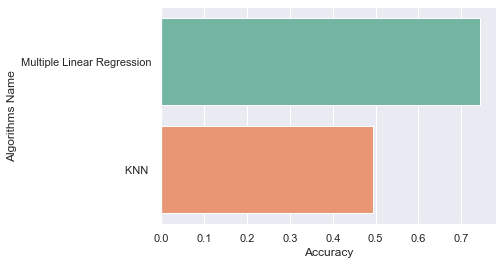

In [42]:
import seaborn as sns
sns.set()
sns.barplot(y="Algorithms Name", x="Accuracy", data = df1, palette="Set2")
sns.set(rc={'figure.figsize':(15,5)})